<h1><center>Project 2: Working with Web Data</center></h1>

image

<h2><center>Mapalo Lukashi, Student ID: 800759428</center></h2>

## Table of Contents

* [Part 1: XML Sitemap Parsing](#first-bullet)
* [Part 2: Using an API](#second-bullet)
* [Part 3: Web Scraping](#third-bullet)
* [Part 4: Analysis of Part 3 data](#fourth-bullet)
* [Conclusion](#fifth-bullet)
* [References & Appendix](#sixth-bullet)

## PART 1: XML Sitemap Parsing <a class="anchor" id="first-bullet"></a>

**Objective**

The aim of this part was to develop a Python class capable of fetching and parsing the sitemap data from the Forbes website ('forbes.com'). This involved processing the 'robots.txt' file to identify sitemap URLs and then extracting information from these sitemaps into a structured DataFrame.

**Methodology**

The following steps were undertaken to achieve the project's objectives:

**1. Identifying Sitemap URLs**

> I began by accessing the 'robots.txt' file of the Forbes website. This file, available at https://www.forbes.com/robots.txt, provided several sitemap URLs. These URLs pointed to XML sitemaps, some of which were compressed using gzip ('.gz' extension).

**2. Python Class Development**

> A Python class named ForbesSitemapParser was created with the following key functionalities:

> Fetching 'robots.txt': The class includes a method to request and read the contents of the 'robots.txt' file.
Extracting Sitemap URLs: A method was implemented to parse the 'robots.txt' content and extract all listed sitemap URLs.
Downloading and Parsing Sitemaps: The class handles the downloading of sitemap files.
Data Extraction: Relevant data from each sitemap entry, such as URL and last modified date, is extracted and stored.
DataFrame Compilation: Extracted data is compiled into a pandas DataFrame for easy analysis and manipulation.


**Usage**

The ForbesSitemapParser class is initialized with the base URL of the Forbes website. It then processes the sitemaps and compiles the data into a DataFrame:

In [1]:
import requests
import pandas as pd
import xml.etree.ElementTree as ET
from urllib.parse import urljoin
from bs4 import BeautifulSoup
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [2]:
# Import the necessary class from my package
from my_webdatapack.ForbesSitemapParser import ForbesSitemapParser

parser = ForbesSitemapParser()
df = parser.get_sitemap_data()
print("Sitemap Report for Forbes")
print("--------------------------------------")
print(f"Total URLs found: {len(df)}")
if not df.empty:
    print(df.head())
else:
    print("No URLs found in the sitemap.")

Sitemap Report for Forbes
--------------------------------------
Total URLs found: 2209
                                                urls
0  https://www.forbes.com/sites/traversmark/2023/...
1  https://www.forbes.com/sites/zengernews/2023/1...
2  https://www.forbes.com/sites/elsaramo/2023/11/...
3  https://www.forbes.com/sites/janehanson/2023/1...
4  https://www.forbes.com/sites/manuelveth/2023/1...


**Dataset Description and Potential Uses**

Dataset Description: The dataset generated from this processis a list of URLs found in Forbes' sitemaps. Each row in the DataFrame represents a different URL from the website.

Potential Uses:

* SEO Analysis: Analyzing the structure of the website and how content is indexed by search engines.
* Content Scraping: Gathering URLs for scraping website content, respecting robots.txt guidelines.
* Site Structure Analysis: Understanding the organization and hierarchy of content on Forbes.com.
* Change Tracking: Monitoring the sitemap over time to detect new or removed pages.

## Part 2: Using an API <a class="anchor" id="second-bullet"></a>

**Introduction**

>The realm of culinary exploration and recipe management has witnessed a surge in the demand for programmatic access to vast databases of recipes and their detailed information. To address this need, I have developed a Python class, RecipeDataCollector, which interfaces with the MealDB API. This tool enables users to efficiently fetch comprehensive recipe information and extract ingredients from recipe texts.

**MealDB API Overview**

> The MealDB API is a comprehensive repository of culinary data, providing access to a vast collection of recipes from various cuisines around the world. It offers functionalities such as searching for recipes by name or ingredient, filtering by category or area, and retrieving detailed information about individual recipes. For the scope of this project, the focus was narrowed to fetching recipe information, extracting ingredients from recipe texts, and exploring additional API features.

**Dataset Description**

> The data retrieved through the MealDB API encompasses: https://www.themealdb.com/api.php

**Recipe Information:**

* Recipe ID: A unique identifier for each recipe.
* Name: Title of the recipe.
* Area: Origin of the recipe.
* Category: Culinary classification of the recipe.
* Instructions: Step-by-step preparation guide.
* Image URL: Link to the recipe's image.

**Ingredients Extraction:**

* Ingredient Name: The name of the ingredient.
* Ingredient Quantity: Amount of the ingredient.
* Ingredient Measure: Measurement unit for the ingredient.

**Implementation**

> Python Class: RecipeDataCollector

> The class was designed with the following features:

* Initialization: Takes an API URL as a parameter and stores it for subsequent API calls.

* Search by Name: Retrieves a list of recipes matching the specified search term.

* List by First Letter: Retrieves a list of recipes starting with the given letter.

* Lookup by ID: Retrieves detailed information about a recipe given its ID.

* Get Random Recipe: Retrieves a random recipe from the database.

* List All Categories: Retrieves a list of all available recipe categories.

> The class utilizes requests for HTTP communication and pandas to structure the returned JSON data into a DataFrame, making it conducive for analysis.

**Usage**

In [3]:
# Import the necessary class from my package
from my_webdatapack.RecipeDataCollector import RecipeDataCollector



In [4]:

# Define the API URL
api_url = "https://www.themealdb.com"

# Create an instance of the RecipeDataCollector class
recipe_collector = RecipeDataCollector(api_url)

# Search for recipes containing "pasta"
pasta_recipes_df = recipe_collector.search_by_name("pasta")
print("Recipes containing 'pasta':")
print(pasta_recipes_df.head())




Recipes containing 'pasta':
      id                       name     area category  \
0  52777  Mediterranean Pasta Salad  Italian  Seafood   

                                        instructions  
0  Bring a large saucepan of salted water to the ...  


In [5]:
# List all recipes starting with the letter 'a'
a_recipes_df = recipe_collector.list_by_first_letter("a")
print("Recipes starting with 'a':")
print(a_recipes_df.head())



Recipes starting with 'a':
      id                        name       area category  \
0  52768        Apple Frangipan Tart    British  Dessert   
1  52893  Apple & Blackberry Crumble    British  Dessert   
2  53049                  Apam balik  Malaysian  Dessert   
3  53050                 Ayam Percik  Malaysian  Chicken   

                                        instructions  
0  Preheat the oven to 200C/180C Fan/Gas 6.\r\nPu...  
1  Heat oven to 190C/170C fan/gas 5. Tip the flou...  
2  Mix milk, oil and egg together. Sift flour, ba...  
3  In a blender, add the ingredients for the spic...  


In [6]:
# Lookup recipe details by ID 52772
recipe_52772_data = recipe_collector.lookup_by_id(52772)
print("Recipe details for ID 52772:")
print(recipe_52772_data)



Recipe details for ID 52772:
{'id': '52772', 'name': 'Teriyaki Chicken Casserole', 'area': 'Japanese', 'category': 'Chicken', 'instructions': 'Preheat oven to 350° F. Spray a 9x13-inch baking pan with non-stick spray.\r\nCombine soy sauce, ½ cup water, brown sugar, ginger and garlic in a small saucepan and cover. Bring to a boil over medium heat. Remove lid and cook for one minute once boiling.\r\nMeanwhile, stir together the corn starch and 2 tablespoons of water in a separate dish until smooth. Once sauce is boiling, add mixture to the saucepan and stir to combine. Cook until the sauce starts to thicken then remove from heat.\r\nPlace the chicken breasts in the prepared pan. Pour one cup of the sauce over top of chicken. Place chicken in oven and bake 35 minutes or until cooked through. Remove from oven and shred chicken in the dish using two forks.\r\n*Meanwhile, steam or cook the vegetables according to package directions.\r\nAdd the cooked vegetables and rice to the casserole dish

In [7]:

# Get a random recipe
random_recipe_data = recipe_collector.get_random_meal()
print("Random recipe:")
print(random_recipe_data)



Random recipe:
{'id': '52925', 'name': 'Split Pea Soup', 'area': 'Canadian', 'category': 'Side', 'instructions': 'Put the gammon in a very large pan with 2 litres water and bring to the boil. Remove from the heat and drain off the water – this helps to get rid of some of the saltiness. Recover with 2 litres cold water and bring to the boil again. Put everything but the frozen peas into the pan and bring to the boil. Reduce to a simmer and cook for 1½-2½ hrs, topping up the water as and when you need to, to a similar level it started at. As the ham cooks and softens, you can halve it if you want, so it is all submerged under the liquid. When the ham is tender enough to pull into shreds, it is ready.\r\nLift out the ham, peel off and discard the skin. While it is still hot (wear a clean pair of rubber gloves), shred the meat. Remove bay from the soup and stir in the frozen peas. Simmer for 1 min, then blend until smooth. Add a splash of water if too thick, and return to the pan to heat t

In [8]:
# List all meal categories
categories_data = recipe_collector.list_all_categories()
print("Meal categories:")
print(categories_data)


Meal categories:
    id           name                                        description
0    1           Beef  Beef is the culinary name for meat from cattle...
1    2        Chicken  Chicken is a type of domesticated fowl, a subs...
2    3        Dessert  Dessert is a course that concludes a meal. The...
3    4           Lamb  Lamb, hogget, and mutton are the meat of domes...
4    5  Miscellaneous  General foods that don't fit into another cate...
5    6          Pasta  Pasta is a staple food of traditional Italian ...
6    7           Pork  Pork is the culinary name for meat from a dome...
7    8        Seafood  Seafood is any form of sea life regarded as fo...
8    9           Side  A side dish, sometimes referred to as a side o...
9   10        Starter  An entrée in modern French table service and t...
10  11          Vegan  Veganism is both the practice of abstaining fr...
11  12     Vegetarian  Vegetarianism is the practice of abstaining fr...
12  13      Breakfast  Breakfast i

## Part 3: Web Scraping <a class="anchor" id="third-bullet"></a>

**Introduction**

> For this part 3, I chose the Katz School Staff Website page to demonstrate my ability to implement web scraping skills using Python. The primary objective was to extract staff information from the Katz School's "Staff" web page, including names, titles, email addresses, phone numbers, and office locations. This report outlines the methods used.

**Overview**

> This part involved several key steps:

> * Data Collection: Utilizing Python's requests library to retrieve the HTML content of the Katz School's staff web page.

> * Data Parsing: Employing the BeautifulSoup library to parse the retrieved HTML content and extract relevant information.

> * Data Organization: Structuring the extracted data into a readable and analyzable format using Python's pandas library.


**Methodology**
> * Web Scraping
Fetching Web Content: The requests library was used to make an HTTP GET request to the Katz School’s staff web page. The status code of the response was checked to ensure successful retrieval of the page.

> * HTML Parsing: BeautifulSoup was utilized to parse the HTML content. The specific HTML elements containing the desired staff information were located and extracted.

**Data Extraction**

> * Names, Titles, Emails, Phone Numbers, and Offices: Regular expressions and string manipulation techniques were used to extract and clean the data. For instance, email addresses were validated using a regular expression pattern.

> * Error Handling: Care was taken to handle missing or irregular data, such as staff members without email addresses or phone numbers.

**usage**

In [2]:

# Import the necessary class from my package

from my_webdatapack.katz_staff_scraper import KatzStaffScraper

# URL of the Katz School's staff web page
url = "https://www.yu.edu/katz/staff"

# Create a KatzStaffScraper instance
scraper = KatzStaffScraper(url)

# Scrape the data
scraper.fetch_page_content()
scraper.parse_html()
names, titles, emails, phone_nums, offices = scraper.extract_staff_details()

# Create a DataFrame
staff_df = scraper.create_dataframe(names, titles, emails, phone_nums, offices)

# Display the DataFrame
staff_df.head()


,name,title,email,phone,office
0,Paul Russo,Vice Provost and Dean \nProfessor of Data Sci...,NA,NA,Office of the Dean
1,Aaron Ross,Assistant Dean for Academic Programs and Depu...,aaron.ross2@yu.edu,646-592-4148,Office of the Dean
2,Sofia Binioris,Director of Communications and Strategic Init...,sofia.binioris@yu.edu,645-592-4719,Office of the Dean
3,Jackie Hamilton,Executive Director of Enrollment Management a...,jackie.hamilton@yu.edu,646-787-6194,Office of the Dean
4,Pamela Rodman,Director of Finance and Administration,pamela.rodman@yu.edu,NA,Office of the Dean


## Part 4: Analysis of Part 3 data <a class="anchor" id="third-bullet"></a>

### *Import the Analysis Module:*

In [3]:
from my_webdatapack.katz_staff_analysis import KatzStaffAnalysis




**Load the DataFrame:**

> Since staff_df is the DataFrame created by the KatzStaffScraper module.


**Initialize the Analysis Object:**


In [4]:
staff_analysis = KatzStaffAnalysis(staff_df)


**Title Distribution:**

In [5]:
titles_count = staff_analysis.title_distribution()
print(titles_count)


title
 Academic Program Coordinator                                                    2
 Vice Provost and Dean \nProfessor of Data ScienceRead Dr. Russo's Biography     1
 Assistant Director                                                              1
 Instructional Designer                                                          1
 Program Manager                                                                 1
 Executive Director of Academic Operations and Teaching and Learning             1
 Director of Graduate Student Life and Community Engagement                      1
 Recruitment Manager - South Asia                                                1
 International Student Advisor                                                   1
 Assistant Director                                                              1
 Assistant Dean for Academic Programs and Deputy to the Dean                     1
 Associate Director of Graduate Admissions Operations                            

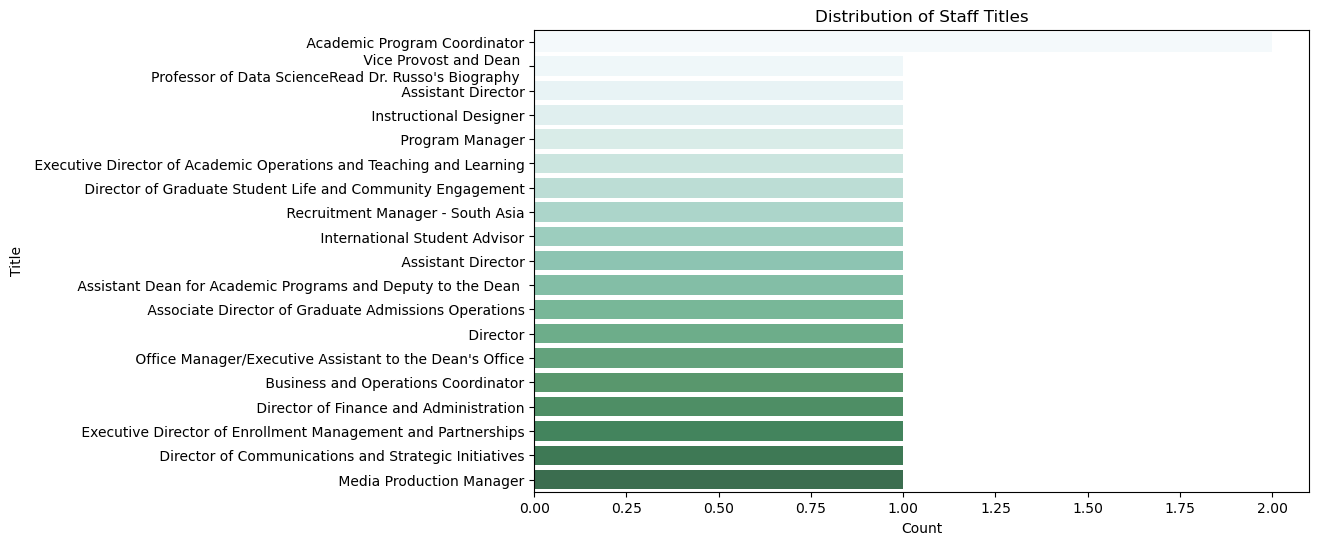

In [9]:
staff_analysis.plot_title_distribution()


**Email Domain Analysis:**

In [13]:
email_domains = staff_analysis.email_domain_analysis()
print(email_domains)


email_domain
yu.edu    19
Name: count, dtype: int64


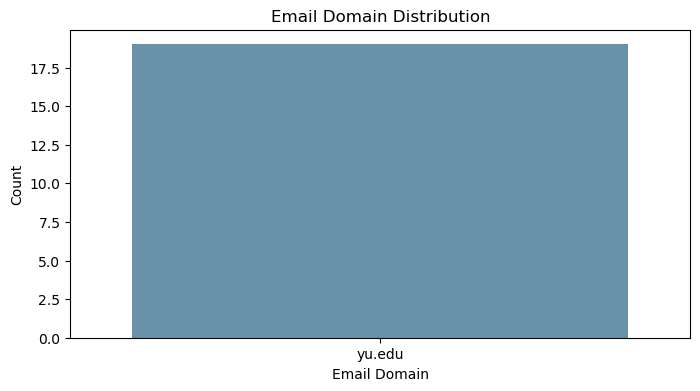

In [14]:
staff_analysis.plot_email_domain_distribution()

**Phone Number Availability:**

In [15]:
phone_availability = staff_analysis.phone_number_availability()
print(phone_availability)


phone
Yes    16
No      4
Name: count, dtype: int64


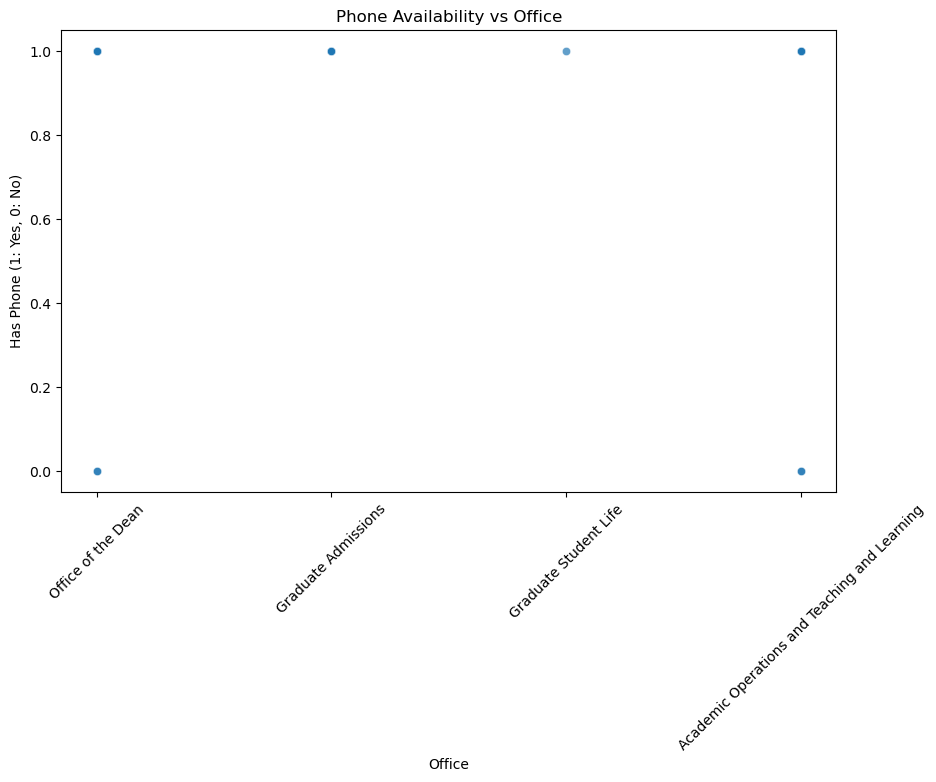

In [16]:
staff_analysis.phone_vs_office_scatter()

**Office Staff Count:**

In [8]:
office_counts = staff_analysis.office_staff_count()
print(office_counts)


office
Office of the Dean                               7
Academic Operations and Teaching and Learning    7
Graduate Admissions                              5
Graduate Student Life                            1
Name: count, dtype: int64


## My Understanding of The Data

**Title Distribution**

* Findings: The titles are diverse, with most titles held by only one individual. Notably, there are two "Academic Program Coordinators" and one "Vice Provost and Dean \nProfessor of Data Science".
* Interpretation: This distribution suggests a wide range of specialized roles within the school, indicating a multifaceted team structure. The presence of a Vice Provost and Dean shows senior academic leadership, while multiple coordinators suggest a focus on academic programming.

**Email Domain Analysis**
* Findings: All 19 staff members whose email addresses are listed have 'yu.edu' as their email domain.
* Interpretation: This uniformity in email domains indicates that the staff primarily uses institutional emails, suggesting formal and internal communication structures. It reflects a standardized approach to professional email usage within the institution.

**Phone Number Availability**
* Findings: Out of the staff members, 16 have phone numbers listed, while 4 do not.
* Interpretation: The majority of the staff has provided phone numbers, which implies a high level of accessibility and openness to direct communication. However, the absence of phone numbers for a few staff members could indicate roles that are less public-facing or more internally focused.

**Office Staff Count**
* Findings: The distribution of staff across offices shows that 7 staff members are each in the "Office of the Dean" and "Academic Operations and Teaching and Learning," 5 in "Graduate Admissions," and 1 in "Graduate Student Life."
* Interpretation: The "Office of the Dean" and "Academic Operations and Teaching and Learning" appear to be major hubs, indicating significant administrative and academic activities in these areas. The smaller count in "Graduate Student Life" might suggest a more specialized or focused role for this office.

**Overall Interpretation**
This analysis provides a comprehensive overview of the staff structure at the Katz School. The varied titles reflect a diverse range of roles and responsibilities. The uniform use of institutional email addresses demonstrates a cohesive internal communication system. The availability of phone numbers for most staff members indicates a general openness to direct contact, enhancing accessibility. The office distribution shows a concentration of staff in key administrative and academic areas, which could be pivotal in understanding the operational dynamics and resource allocation within the school.